### Import Libraries and Read Data

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data = pd.read_excel('https://github.com/Prenagen24/Tugas-Besar-Machine-Learning/raw/main/cleaned-factbook.xlsx')

### EDA

In [ ]:
#Assigning into a New DataFrame
parameter = ["Exports","Imports","Industrial production growth rate","Investment","Unemployment rate"]
df = data[parameter]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Exports                            149 non-null    int64  
 1   Imports                            149 non-null    int64  
 2   Industrial production growth rate  133 non-null    float64
 3   Investment                         143 non-null    float64
 4   Unemployment rate                  127 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.9 KB


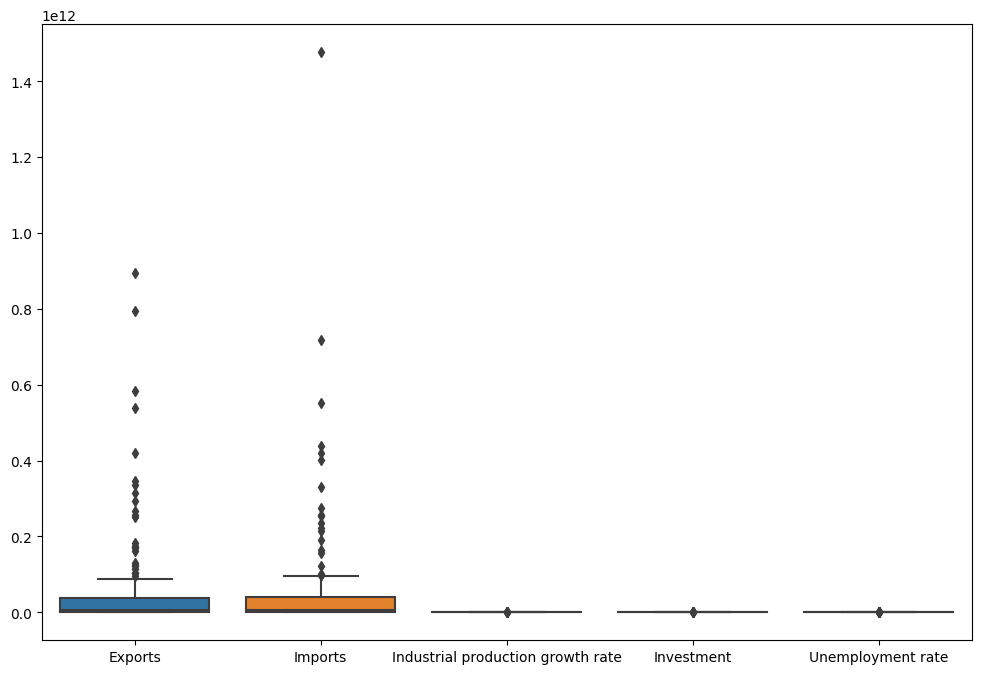

In [ ]:
#Boxplot of Real Data
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.show()

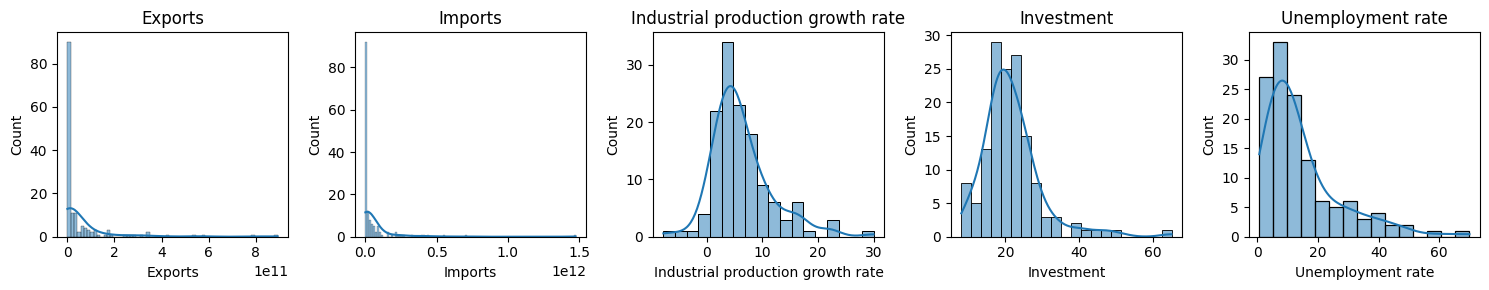

In [ ]:
#Histogram of Real Data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
#Remove NULL Value and Scaling
df = data[parameter].dropna()
norm = StandardScaler()
df = pd.DataFrame(norm.fit_transform(df))
df = df.rename(columns={0: 'Exports',1: 'Imports',2: 'Industrial production growth rate',3: 'Investment',4: 'Unemployment rate'})
df

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,3.112266,1.843781,0.068428,0.287108,-0.744768
1,5.493021,3.622263,-0.724265,-0.497733,-0.271611
2,0.252674,-0.220986,-0.616171,-0.546786,0.883212
3,0.585106,0.099243,0.032397,-0.313786,-0.456062
4,0.371544,0.258453,-0.273871,-0.154365,-0.849023
...,...,...,...,...,...
109,1.752986,1.434318,-0.994502,-0.289260,-0.432004
110,0.652265,0.828313,-0.580139,0.458792,-0.287651
111,1.825517,2.056137,-0.958470,-0.669417,-0.736749
112,0.077324,0.128555,-0.778313,0.446529,-0.712690


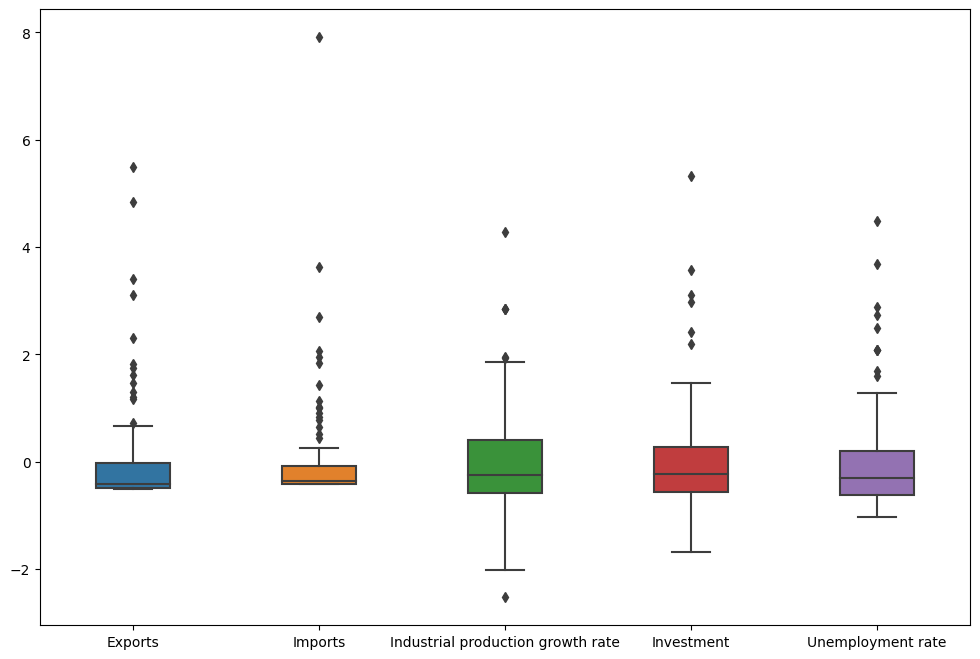

In [ ]:
#Boxplot of Scaled Data
plt.figure(figsize=(12,8))
sns.boxplot(df, width = 0.4)
plt.show()

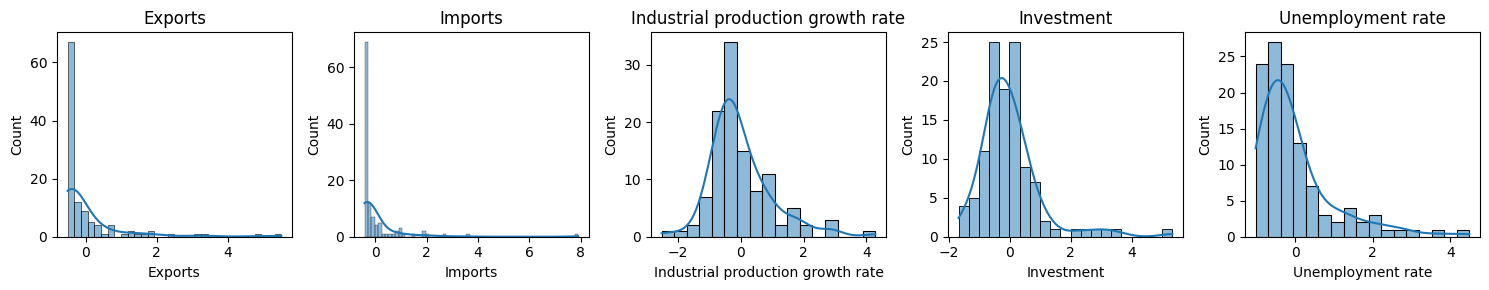

In [ ]:
#Histogram of Scaled Data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

### k-Means Algorithm

In [ ]:
#Initialize Centorids Function
def init_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

#Assign Labels Function
def asgn_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

#Centroid Updata Function
def updt_centroids(data, labels):
    centroids = df.groupby(labels).apply(lambda x: np.mean(x, axis = 0)).T
    return centroids


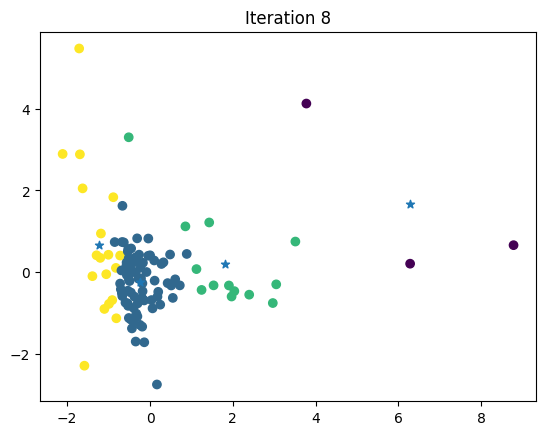

Inertia :  9.935003430526734


0      2
1      0
2      1
3      1
4      1
      ..
109    2
110    2
111    2
112    1
113    0
Length: 114, dtype: int64

In [ ]:
#Scatter Plot Function
def plot_clusters(data_2d, centroids_2d, labels, iteration):
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c = labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='*')
    plt.show()

#Inertia Calculation Function
def inertia(data,centroid,lab):
    res = 0.0
    total = 0.0
    for i in range(len(centroid)):
        inertiaClus = 0
        count = 0
        for j in range(len(lab)) :
            clustDist = 0.0
            if lab[j] == i :
                clustDist = ((data[j][0]-centroid[i][0])**2 + (data[j][1]-centroid[i][1])**2)
                count += 1
            inertiaClus += clustDist
        res += (inertiaClus/len(centroid))
    return res/len(centroid)

#k-Means Function
def kMeans(data,curCentroids,prevCentroids,centroidCount) :
    iteration = 1
    max_iterations = 100
    inertiaVal = 0
    data_2d = 0
    centroids_2d = 0
    labels = 0
    while iteration <= max_iterations and not curCentroids.equals(prevCentroids):
        prevCentroids = curCentroids

        labels = asgn_labels(df, curCentroids)
        pca = PCA(n_components=2)
        data_2d = pca.fit_transform(df)
        centroids_2d = pca.transform(curCentroids.T)
        plot_clusters(data_2d,centroids_2d,labels,iteration)
        curCentroids = updt_centroids(df,labels)
        iteration += 1

    inertiaVal = inertia(data_2d,centroids_2d,labels)
    return inertiaVal,labels

kCount = 4
centroids = init_centroids(df,kCount)
old_centroids = pd.DataFrame()
inertiaRes, labelRes = kMeans(df, centroids, old_centroids, kCount)
print("Inertia : ", inertiaRes)
labelRes

In [ ]:
#Testing Function
def kMeansTest(data,curCentroids,prevCentroids,centroidCount) :
    iteration = 1
    max_iterations = 100
    inertiaVal = 0
    data_2d = 0
    centroids_2d = 0
    labels = 0
    while iteration <= max_iterations and not curCentroids.equals(prevCentroids):
        prevCentroids = curCentroids

        labels = asgn_labels(df, curCentroids)
        pca = PCA(n_components=2)
        data_2d = pca.fit_transform(df)
        centroids_2d = pca.transform(curCentroids.T)
        curCentroids = updt_centroids(df,labels)
        iteration += 1

    inertiaVal = inertia(data_2d,centroids_2d,labels)
    return inertiaVal

elbowList = []
old_centroids = pd.DataFrame()
for k in range(10):
    centroids = init_centroids(df, k+1)
    elbowList.append(kMeansTest(df,centroids,old_centroids,k+1))
    print(k+1, " Cluster Inertia: ", elbowList[k])

1  Cluster Inertia:  373.5219092170194
2  Cluster Inertia:  81.47163330228406
3  Cluster Inertia:  17.51229182264696
4  Cluster Inertia:  11.07920819213243
5  Cluster Inertia:  5.7328592796218745
6  Cluster Inertia:  3.2972475442552063
7  Cluster Inertia:  2.7541161688046323
8  Cluster Inertia:  1.352460528606032
9  Cluster Inertia:  0.856565576574502
10  Cluster Inertia:  0.6981544736663784


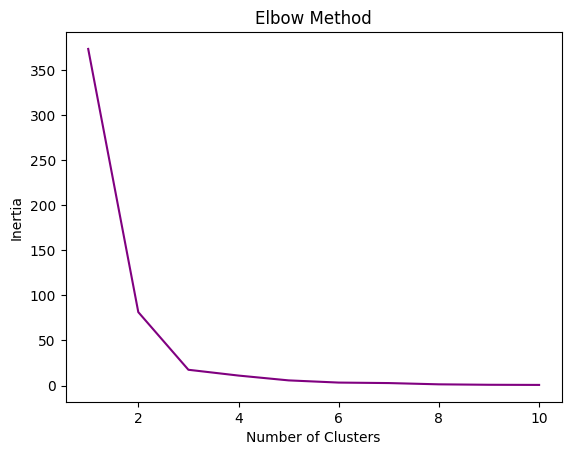

In [ ]:
#Elbow Method
x = list(range(1,len(elbowList)+1))
ax = sns.lineplot(x=x, y=elbowList, color="Purple")
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show()

### Result

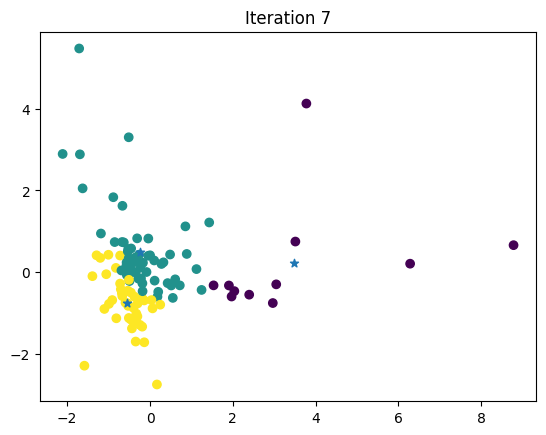

Inertia :  20.50543659580236


In [ ]:
#Optimal Cluster Result
kCount = 3
centroids = init_centroids(df,kCount)
old_centroids = pd.DataFrame()
inertiaRes, labelRes = kMeans(df, centroids, old_centroids, kCount)
print("Inertia : ", inertiaRes)

In [ ]:
#Dataframe Result
dfRes = data[["Country","Exports","Imports","Industrial production growth rate","Investment","Unemployment rate"]]
dfRes = dfRes.dropna().reset_index(drop=True)
labelRes = pd.DataFrame(labelRes)
dfRes = pd.concat([dfRes,labelRes],axis=1)
dfRes = dfRes.rename(columns={0:'Cluster'})
dfRes

,Country,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate,Cluster
0,Japan,538800000000,401800000000,6.6,24.0,4.7,0
1,Germany,893300000000,716700000000,2.2,17.6,10.6,0
2,Saudi Arabia,113000000000,36210000000,2.8,17.2,25.0,2
3,Russia,162500000000,92910000000,6.4,19.1,8.3,1
4,Switzerland,130700000000,121100000000,4.7,20.4,3.4,1
...,...,...,...,...,...,...,...
109,Italy,336400000000,329300000000,0.7,19.3,8.6,0
110,Spain,172500000000,222000000000,3.0,25.4,10.4,1
111,United Kingdom,347200000000,439400000000,0.9,16.2,4.8,0
112,Australia,86890000000,98100000000,1.9,25.3,5.1,1


In [ ]:
dfRes[dfRes['Cluster'] == 0].describe()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate,Cluster
count,9.800000e+01,9.800000e+01,98.000000,98.000000,98.000000,98.0
mean,3.867995e+10,3.528234e+10,6.019388,20.165306,13.403061,0.0
std,5.576611e+10,5.146781e+10,4.872427,5.094268,11.290690,0.0
min,4.930000e+07,4.152000e+08,-7.800000,8.000000,1.500000,0.0
25%,2.957500e+09,3.642750e+09,3.150000,17.000000,6.300000,0.0
50%,1.123500e+10,1.132000e+10,5.000000,19.750000,10.500000,0.0
75%,5.943500e+10,4.553750e+10,8.425000,23.750000,15.075000,0.0
max,2.557000e+11,2.350000e+11,22.000000,33.600000,70.000000,0.0


In [ ]:
dfRes[dfRes['Cluster'] == 1].describe()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate,Cluster
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.0
mean,4.789600e+11,5.120000e+11,3.740000,22.000000,7.380000,1.0
std,2.193314e+11,3.682705e+11,5.056613,8.815895,2.235969,0.0
min,2.681000e+11,2.527000e+11,0.700000,15.700000,4.700000,1.0
25%,3.208000e+11,2.892500e+11,0.925000,18.000000,5.625000,1.0
50%,3.831000e+11,4.107500e+11,1.850000,19.350000,6.850000,1.0
75%,5.720250e+11,5.241500e+11,3.850000,22.000000,9.500000,1.0
max,8.933000e+11,1.476000e+12,17.100000,46.000000,10.600000,1.0


In [ ]:
dfRes[dfRes['Cluster'] == 2].describe()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate,Cluster
count,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.0
mean,2.110150e+09,1.810300e+09,13.633333,45.483333,34.533333,2.0
std,1.421589e+09,1.160023e+09,10.809379,12.152105,21.504108,0.0
min,4.845000e+08,7.309000e+08,3.400000,29.000000,1.200000,2.0
25%,9.040500e+08,1.021425e+09,4.725000,40.050000,23.250000,2.0
50%,2.159500e+09,1.343000e+09,11.200000,44.200000,37.500000,2.0
75%,3.068750e+09,2.517250e+09,20.375000,49.850000,48.750000,2.0
max,4.000000e+09,3.622000e+09,30.000000,65.100000,60.000000,2.0


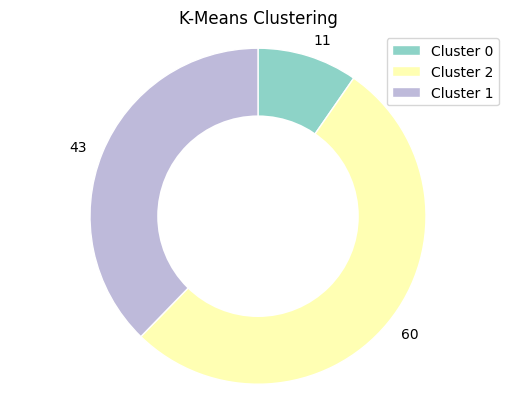

In [ ]:
listCluster = dfRes["Cluster"].values.tolist()
cluster_counts = [listCluster.count(i) for i in range(max(listCluster) + 1)]
colors = sns.color_palette('Set3', len(cluster_counts))
plt.pie(cluster_counts, labels=cluster_counts, colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'})
center_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
legend_labels = ['Cluster {}'.format(label) for label in dfRes["Cluster"].unique()]
plt.legend(legend_labels, loc='upper right')
plt.axis('equal')  # Ensure the plot is a circle
plt.title('K-Means Clustering')
plt.show()